In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**TS Load**

In [2]:
TS = pd.read_csv('C:/Users/ren.x.1/Desktop/VS_TS.csv')
TS.head()

,DatePay,SALES_IN_ML
0,2015-12-01,400735
1,2015-12-02,256915
2,2015-12-03,317555
3,2015-12-04,219775
4,2015-12-05,228325


In [3]:
TS['DatePay'] = pd.to_datetime(TS.DatePay)
TS = TS.groupby(TS.DatePay).sum()

In [4]:
TS.head()

,SALES_IN_ML
DatePay,
2015-12-01,400735
2015-12-02,256915
2015-12-03,317555
2015-12-04,219775
2015-12-05,228325


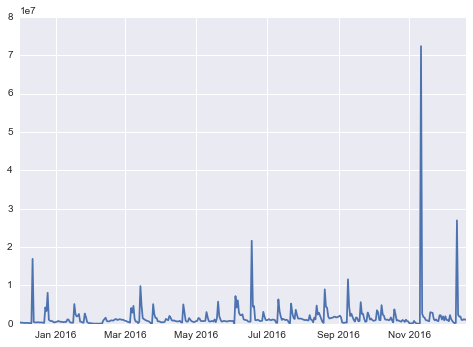

In [5]:
plt.plot(TS)

**Stationary Test**

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=10)
    rolstd = pd.rolling_std(timeseries, window=10)

    #Plot rolling statistics:
    plt.figure(figsize=(14,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries.SALES_IN_ML, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

**Transformation**

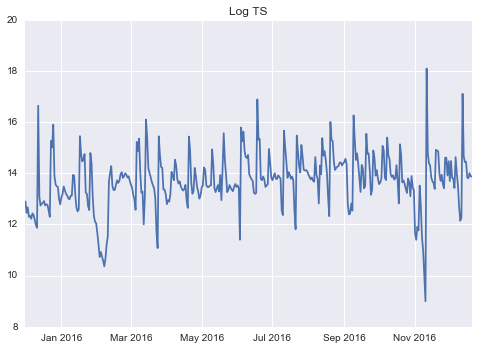

In [7]:
# log transformation
TS_log = np.log(TS)
plt.plot(TS_log)
plt.title('Log TS')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).std()


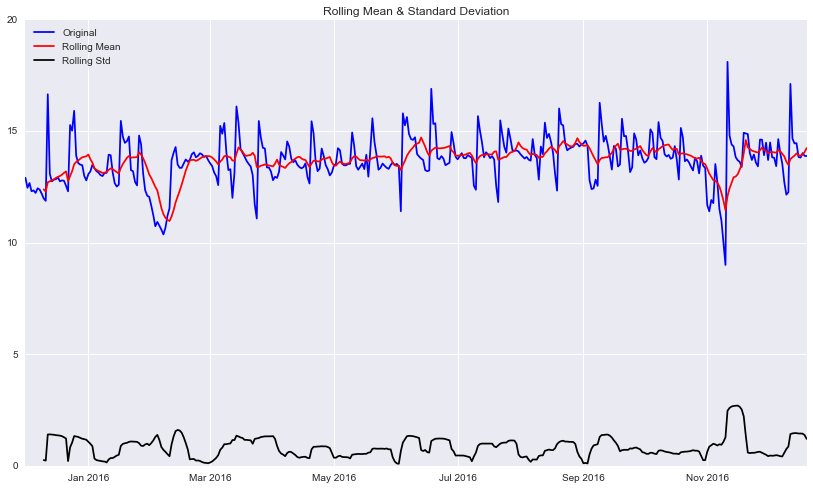

Results of Dickey-Fuller Test:
Test Statistic                -1.111257e+01
p-value                        3.629169e-20
#Lags Used                     0.000000e+00
Number of Observations Used    3.850000e+02
Critical Value (5%)           -2.869077e+00
Critical Value (1%)           -3.447450e+00
Critical Value (10%)          -2.570785e+00
dtype: float64


In [8]:
test_stationarity(TS_log)

**ACF/PACF Plot**

In [9]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

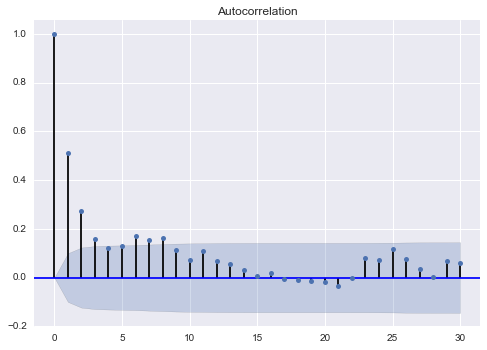

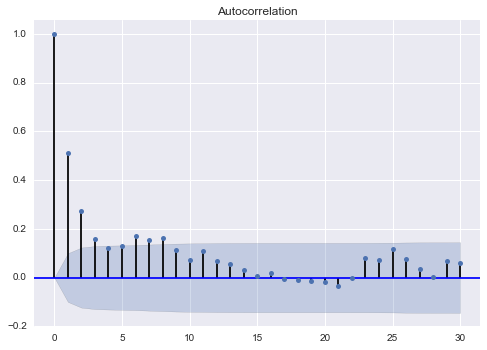

In [10]:
plot_acf(TS_log, lags=30)

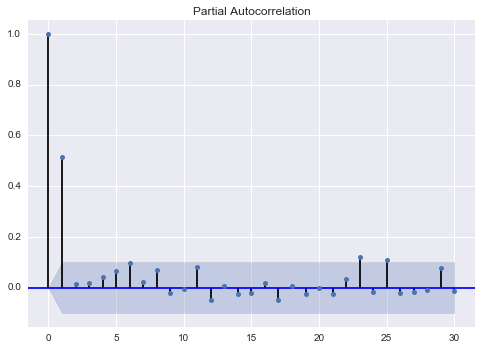

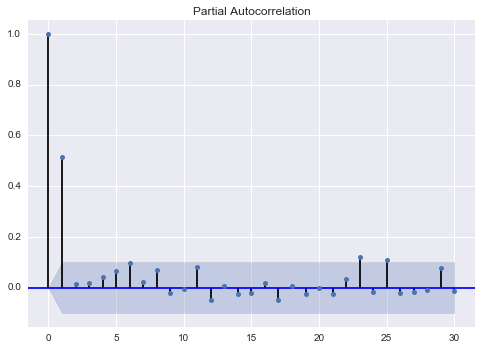

In [11]:
plot_pacf(TS_log, lags=30)

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic

In [13]:
arma_order_select_ic(TS_log, max_ar=4, max_ma=0, ic='aic')

{'aic':              0
 0  1163.098292
 1  1047.336106
 2  1049.250028
 3  1051.121757
 4  1052.412301, 'aic_min_order': (1, 0)}

**I would argue a simple AR(1) model**

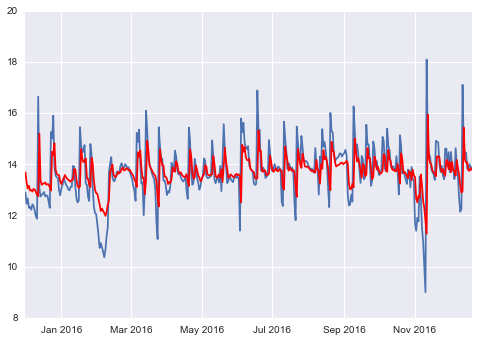

In [75]:
model = ARIMA(TS_log, order=(1, 0, 0))  
results_AR = model.fit(disp= 1)  
plt.plot(TS_log)
plt.plot(results_AR.fittedvalues, color='red')
TS_fitted = pd.DataFrame(results_AR.fittedvalues,columns=['SALES_IN_ML'])

In [126]:
# unit root test
results_AR.arparams.sum()

0.51238475838982256

**Residual Series Check**

In [110]:
residuals = TS_log - TS_fitted

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).std()


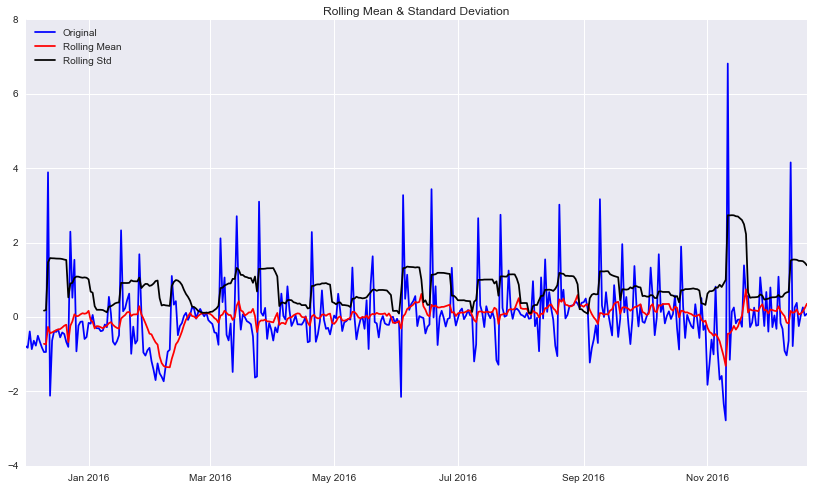

Results of Dickey-Fuller Test:
Test Statistic                 -19.716299
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    385.000000
Critical Value (5%)             -2.869077
Critical Value (1%)             -3.447450
Critical Value (10%)            -2.570785
dtype: float64


In [111]:
test_stationarity(residuals)

**Seems the residual series is stationary**

In [112]:
# Restore to the original scale
TS_predicted = np.exp(TS_fitted)

In [113]:
TS_predicted.head()

,SALES_IN_ML
DatePay,
2015-12-01,878216.601716
2015-12-02,587502.098584
2015-12-03,467826.067359
2015-12-04,521481.525277
2015-12-05,431856.047710


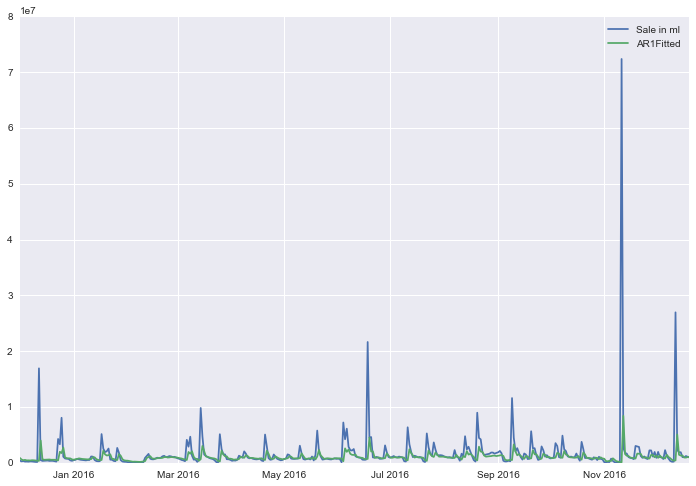

In [114]:
plt.figure(figsize=(12,8))
plt.plot(TS,label = 'Sale in ml')
plt.plot(TS_predicted,label = 'AR1Fitted')
plt.legend()

---